# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>

To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.


## Business Understanding

The CRISP-DM process starts with the understanding of the business problem. The purpose of this assignment is to understand data, visualize carefully, model using various regressor algorithms and evaluate which model would be best for the prediction of used car prices for deployment.  

Imagine for example a used car dealer who needs estimates what the price of a used car could be. The car dealer could be interest in predicting the price of a car based on its attributes. In this project we try to answer to the following 3 business questions:
1. What are the top two best model recommendation for the dealers for predictiong used car price after evaluating different models? <br>
2. Discuss the factors of evaluated scores for car price prediction? <br>
3. What are the suggestions for fine tuning the top best models for car price predictions close to the actual price? <br>

The following table of contents provides the plan for the analysis.  This plan is totally depends on dataset and columns used for estimation purpose.  All responses for the questions mentioned above are the result of tasks performed on the data in the dataset.

<a id="head"></a>
### Table of Contents 
1. [Import necessary libraries](#1)<br><br>
2. [Read dataset and first glance](#2)<br><br>
3. [Data Cleaning](#3)
  - [Outliers](#3.1)
  - [Uncorrelated columns](#3.2)
  - [Filling null values](#3.3)
  - [Remove samples based on common sense](#3.4)
  - [Remove insufficient records](#3.5)<br><br>
4. [Data Visualization](#4)<br><br>
5. [Model Preparation](#5)
  - [Encoding categorical features](#5.1)
  - [Normalization](#5.2)
  - [Split training and testing set](#5.3)<br><br>
6. [Models and tuning](#6)
  - [Linear regression](#6.1)
  - [Lasso regression](#6.2)
  - [Ridge Regression](#6.3)
  - [Ridge Regression using GridSearchCV](#6.4)
  - [K-NearestNeighbor](#6.5)<br><br>
7. [Evaluate by model comparison using R2 score and RMSE values](#7)<br><br>

## Data Understanding

After considering the business understanding, we want to get familiar with our data.  The following steps and notes in each step explains the process of understanding data from business point of view, identifiy issue, transformation requirements, normalize data for modeling purposes. This process helps to explore data and read them as information it contains.

### Findings in dataset:
1. Vehicles dataset has 426880 rows and 18 columns
2. This dataset has null values in various records for most of the features.
3. There are 14 catagorical features and only 4 numerical columns in this dataset.
4. There are only 3 columns (price, year and odometer) have correlation to each other
5. Id and VIN columns do not have any meaningful relationship with other columns in the dataset 
6. All other categorical features need transformation to numeric data for further analysis.
7. Remove all rows with null values which do not contribute any importance in the dataset for analysis

<a id="1"></a>
#### 1. Import necessary libraries:
[Back to top](#head)

In [1]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Ridge, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_rows',30)
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)


<a id="2"></a>
#### 2. Read dataset and first glance
[back to top](#head)

In [2]:
df = pd.read_csv('data/vehicles.csv')
df_original = df

In [3]:
df.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

From this basic statistical infomation of the dataset, we can find that:
1. There are about **425,675** samples in the dataset.
2. There are **"cars"** in the dataset, whose prices are 0. These samples should be removed.
3. The maximal price is **5.9 billion**. it is an outlier, no matter it is real or not.
4. The maximal odometer read is $1.0 *10^7$ miles, which should also be an outlier.

According to our finding above, this dataset **must be cleaned** before we start applying any analysis on it.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

There are also a lot of **missing values** among features.

In [5]:
df.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

Many columns have **nothing to do with the prices of the car**, such as "id". We will remove columns like this in the next section.

## Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

<a id="3"></a>
### 3. Data Cleaning
[Back to top](#head)

<a id="3.1"></a>
#### 3.1 Outliers

Fist we need to remove the outliers of the **prices**. See the output from df.describe(), the price range between 25% to 75% quantile of our dataset is 5900 ~ 26485, but the maximum price is 3.7*10^9, which is too high for a price!

<AxesSubplot:title={'center':'Box plot of the prices'}, xlabel='price'>

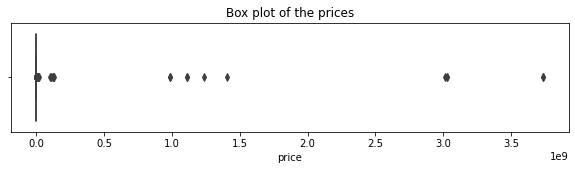

In [6]:
fig, ax = plt.subplots(figsize=(10,2))
ax.set_title('Box plot of the prices')
sns.boxplot(x='price', data = df)

There indeed are **some extremely large prices** in our box plot. They are too large for us to actually see the "box". We have to remove them. The common way to remove the outliers is using **interquartile range** showing below.

In [7]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 *IQR)
init_size = df.count()['id']
df = df.loc[filter]  
filtered_size = df.count()['id']
print(init_size-filtered_size,'(', '{:.2f}'.format(100*(init_size-filtered_size)/init_size), '%',')', 'outliers removed from dataset')

8177 ( 1.92 % ) outliers removed from dataset


With 2% data loss, we now get a much better distribution of prices.

But when we draw the distribution plot of the prices:

<AxesSubplot:title={'center':'Distribution of the prices'}, xlabel='price'>

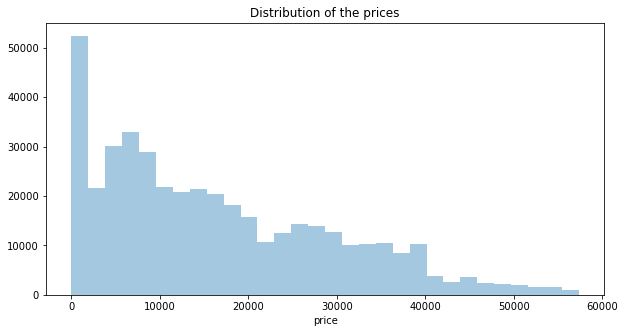

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Distribution of the prices')
sns.distplot(df['price'], bins=30, kde=False)

We can see that there are a large amount of wierd "zero price cars" in our dataset. We have to remove them as well.

Here we set a threshhold of **$600**.

In [9]:
df = df[df['price']>600]

Now let's see whether there are outliers to remove in the **odometer column**.

<AxesSubplot:title={'center':'Box plot of the odometer'}, xlabel='odometer'>

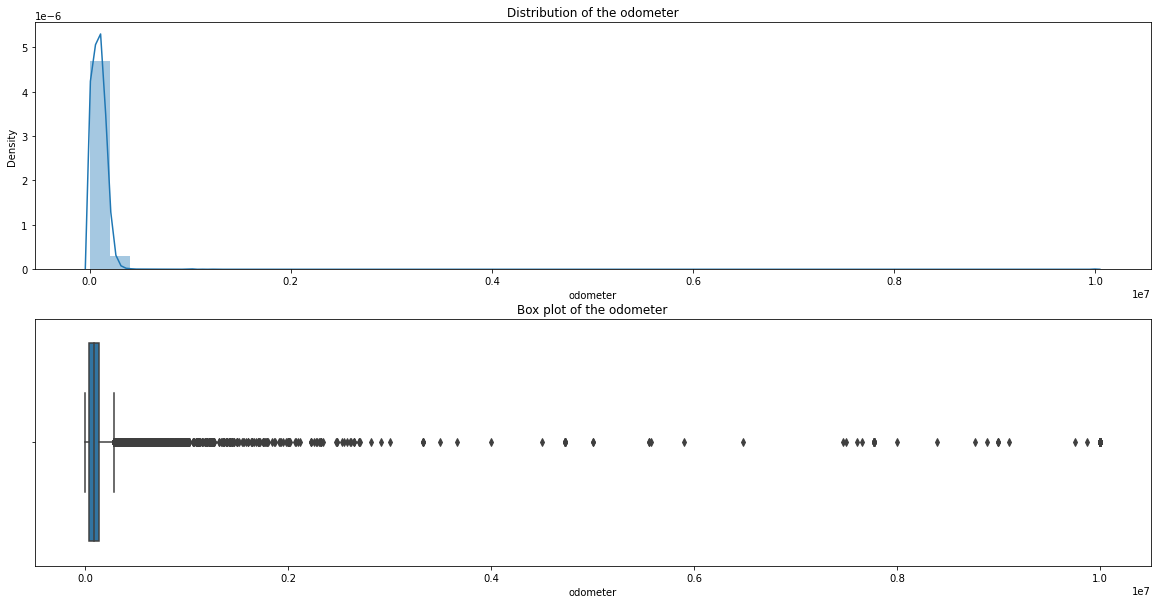

In [10]:
fig, axs = plt.subplots(2, figsize=(20,10))
sns.distplot(df['odometer'], ax = axs[0])
axs[0].set_title('Distribution of the odometer')
axs[1].set_title('Box plot of the odometer')
sns.boxplot(x='odometer', data = df, ax=axs[1])

Same problem happens to the odometer column. The outliers could come from two situations:

1. **Mistakes in the samples**
2. Most of the used cars have relatively low mileage, which **lower the median**, while some other cars actally run that far.

However, both situations cause uncertainty to the prediction of our future model, thus we remove these outliers using the same method as above. The only differece is our filter:

1. **Extremly small odoemter is OK** to keep, as they tend to be new cars.
2. The upper threshold is set to be higher, accepting more samples.

In [11]:
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['odometer'] <= Q3 + 3 *IQR)
init_size = df.count()['id']
df = df.loc[filter]  
filtered_size = df.count()['id']
print(init_size-filtered_size,'(', '{:.2f}'.format(100*(init_size-filtered_size)/init_size), '%',')', 'outliers removed from dataset')


3276 ( 0.87 % ) outliers removed from dataset


Although we give up **1%** of our data, the odometer column now should look normal.

<a id="3.2"></a>
#### 3.2 Uncorrelated columns

Next we need to drop some uncorrelated columns. They are columns that we are pretty sure having no correlations to the car prices. This include the **id, region, title_status, VIN** (as it is an empty column). As for its **state and cordinate**, we need to make sure they don't have high correlation to the price.

<AxesSubplot:title={'center':'Mean car price of each state'}, xlabel='state'>

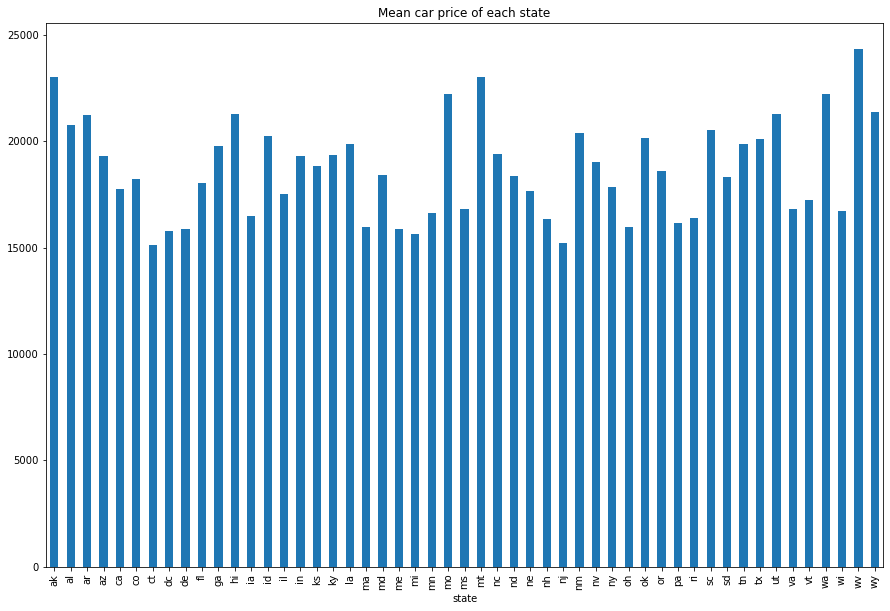

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Mean car price of each state')
df.groupby(['state']).mean()['price'].plot.bar(ax=ax)

![states](https://steinsgate.gq/Capture.jpg)

**The prices don't differ very much in each states in the US** either. But we do find that the used car prices are slightly higher in the states neighboured on Canada (such as **Alaska, Missouri, Washington, Montana, West Virginia**).

**As locations do not have major correlation to the prices**, I choose to **remove 'state'** as well.

In [13]:
df = df.drop(columns = ['id', 'region', 'title_status', 'VIN', 'state'])

In [14]:
df.head()

price    year manufacturer                     model  condition  \
27  33590  2014.0          gmc  sierra 1500 crew cab slt       good   
28  22590  2010.0    chevrolet            silverado 1500       good   
29  39590  2020.0    chevrolet       silverado 1500 crew       good   
30  30990  2017.0       toyota      tundra double cab sr       good   
31  15000  2013.0         ford                 f-150 xlt  excellent   

      cylinders fuel  odometer transmission drive       size    type  \
27  8 cylinders  gas   57923.0        other   NaN        NaN  pickup   
28  8 cylinders  gas   71229.0        other   NaN        NaN  pickup   
29  8 cylinders  gas   19160.0        other   NaN        NaN  pickup   
30  8 cylinders  gas   41124.0        other   NaN        NaN  pickup   
31  6 cylinders  gas  128000.0    automatic   rwd  full-size   truck   

   paint_color  
27       white  
28        blue  
29         red  
30         red  
31       black

Now the feature columns are all believe **correlated to the prices**.

<a id="3.3"></a>
### 3.3 Filling null values

Now that we have column 'model', there is no need for the column 'manufacturer' for modeling (as normally one car model only belongs to one manufacturer). But as it is still needed for further visualization, we store this column into a new data frame (**df_man**) before removing it.

In [15]:
df_man = df['manufacturer'].to_frame()

In [16]:
df = df.drop(columns = ['manufacturer'])

Now let's check the distribution of the null values among all columns.

<AxesSubplot:title={'center':'Distribution of the missing values (yellow records)'}>

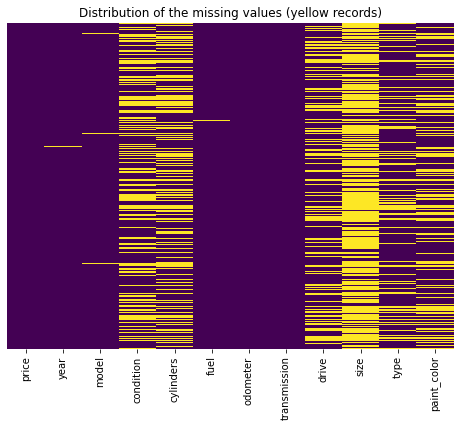

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Distribution of the missing values (yellow records)')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Based on the situation that there are plenty of null values in our dataset, and the fact that these missing values are **hard to fill with proper guesses**. we decide to take the following three actions:
1. For columns that have **too much** missing values, we **remove the whole column**. (for column "size")
2. For columns that have **very few** missing values, we **remove the corresponding rows**. (for column "year", "manufacturer", "model", "fuel", "transmission", "drive", "type", "paint_color")
3. For columns that have **intermediate number of missing values**, such as "condition" and "cylinders", we choose to **keep the missing values and assign them another unique category called "null"**.

In [18]:
df = df.drop(columns = ['size'])

In [19]:
rm_rows = ['year', 'model', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
for column in rm_rows:
    df = df[~df[column].isnull()]

In [20]:
df = df.replace(np.nan, 'null', regex=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192611 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         192611 non-null  int64  
 1   year          192611 non-null  float64
 2   model         192611 non-null  object 
 3   condition     192611 non-null  object 
 4   cylinders     192611 non-null  object 
 5   fuel          192611 non-null  object 
 6   odometer      192611 non-null  float64
 7   transmission  192611 non-null  object 
 8   drive         192611 non-null  object 
 9   type          192611 non-null  object 
 10  paint_color   192611 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 17.6+ MB


<AxesSubplot:title={'center':'Distribution of the missing values (yellow records)'}>

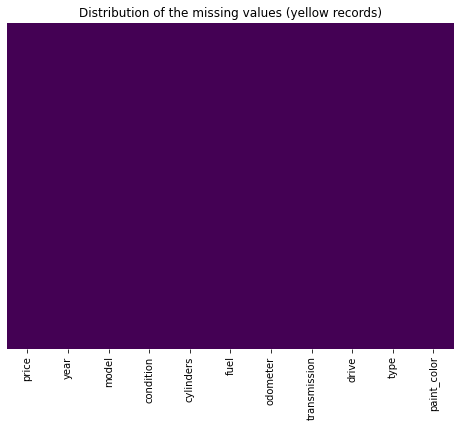

In [21]:
df.info()
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Distribution of the missing values (yellow records)')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now there is **no missing values** in our dataset.

<a id="3.4"></a>
#### 3.4 Remove samples based on common sense

Let's first see the relationship between **prices** and **mileages (odometer)**.

<AxesSubplot:title={'center':'Scatter plot between mileages and prices'}, xlabel='odometer', ylabel='price'>

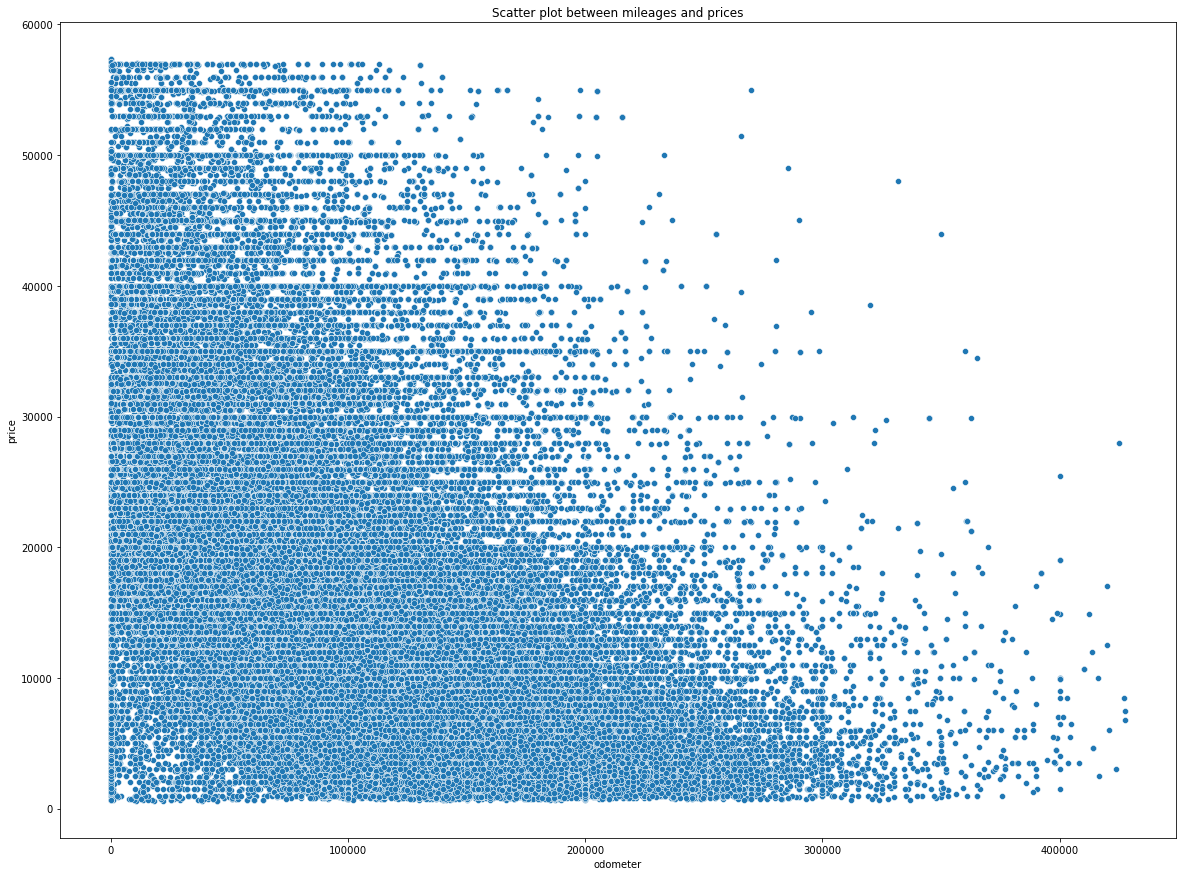

In [22]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot between mileages and prices')
sns.scatterplot(x='odometer', y='price', data=df)

**Higher odometer tends to have lower prices**, while lower odometer tends to be more expensive. Also, a funny observation is that people tend to set their prices easy to remember such as 5000, 5100, 8999 (there are **many horizontal straight lines** in the scatter plot above).

However, there are some **relatively new cars were sold nearly for zero price**, which is against common sense. Thus we need to do some intervention to it.

In [23]:
df = df[(df['price']+df['odometer'])>5000]

Cars that are too old (let's say **earier than 1960**) will increase uncertainty to our data prediction, because of the insufficient amount and probably unstable prices (some of them can be regarded as antiques). So we remove the samples **older than 1960**.

In [24]:
df = df[df['year']>1960]

<a id="3.5"></a>
#### 3.5 Remove insufficient records

In [25]:
df_man['manufacturer'].value_counts()

ford            60998
chevrolet       47517
toyota          30428
honda           19207
nissan          16630
                ...  
datsun             59
aston-martin       11
land rover         11
ferrari             8
morgan              3
Name: manufacturer, Length: 42, dtype: int64

Some brands have **too few samples**.

We remove the manufacturers which hold **less than 100 records**.

In [26]:
rm_brands = ['harley-davidson', 'alfa-romeo', 'datsun', 'tesla', 'land rover', 'porche', 'aston-martin', 'ferrari']
for brand in rm_brands:
    df_man = df_man[~(df_man['manufacturer'] == brand)]

Now let's head to the car models. For the precision of our future model, we choose to remove the **car models which have less than 50 samples**. It will narrow the capability of our model, but in return lower the bias and variance.

In [27]:
df = df.groupby('model').filter(lambda x: len(x) > 50)

In [28]:
df['model'].value_counts()

f-150                    4054
silverado 1500           2609
1500                     1850
camry                    1561
silverado                1463
                         ... 
corvette stingray z51      51
gx 460                     51
f-450                      51
300-series                 51
cts sedan 4d               51
Name: model, Length: 610, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123161 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         123161 non-null  int64  
 1   year          123161 non-null  float64
 2   model         123161 non-null  object 
 3   condition     123161 non-null  object 
 4   cylinders     123161 non-null  object 
 5   fuel          123161 non-null  object 
 6   odometer      123161 non-null  float64
 7   transmission  123161 non-null  object 
 8   drive         123161 non-null  object 
 9   type          123161 non-null  object 
 10  paint_color   123161 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 11.3+ MB


<a id="4"></a>
### 4. Data Visualizations
[Back to top](#head)

<AxesSubplot:title={'center':'Distribution of the prices'}, xlabel='price'>

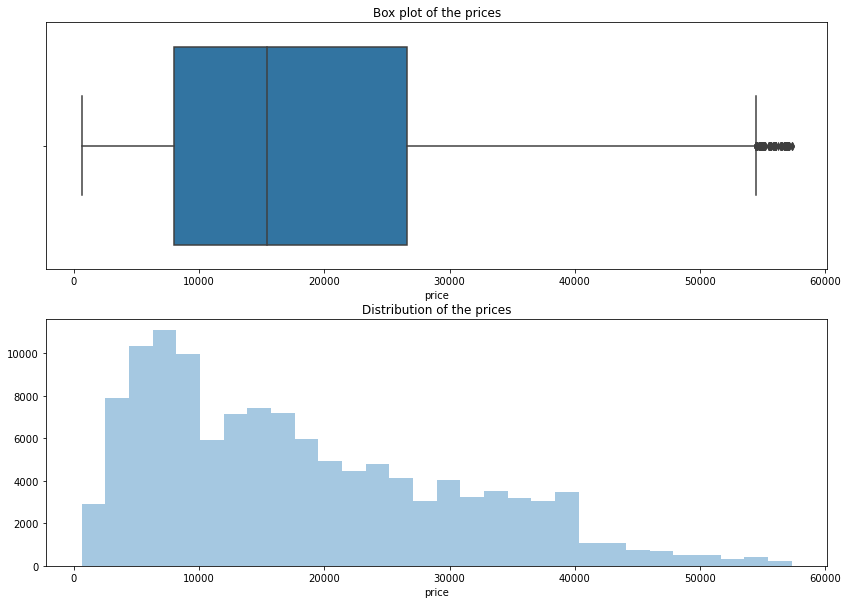

In [30]:
fig, axs = plt.subplots(2, figsize=(14, 10))
axs[0].set_title('Box plot of the prices')
sns.boxplot(x='price', data = df, ax = axs[0])
axs[1].set_title('Distribution of the prices')
sns.distplot(df['price'], ax=axs[1], bins=30, kde=False)

We see that after the data cleaning, the distribution of the prices looks better.

Text(0.5, 1.0, 'Distribution of the odometer')

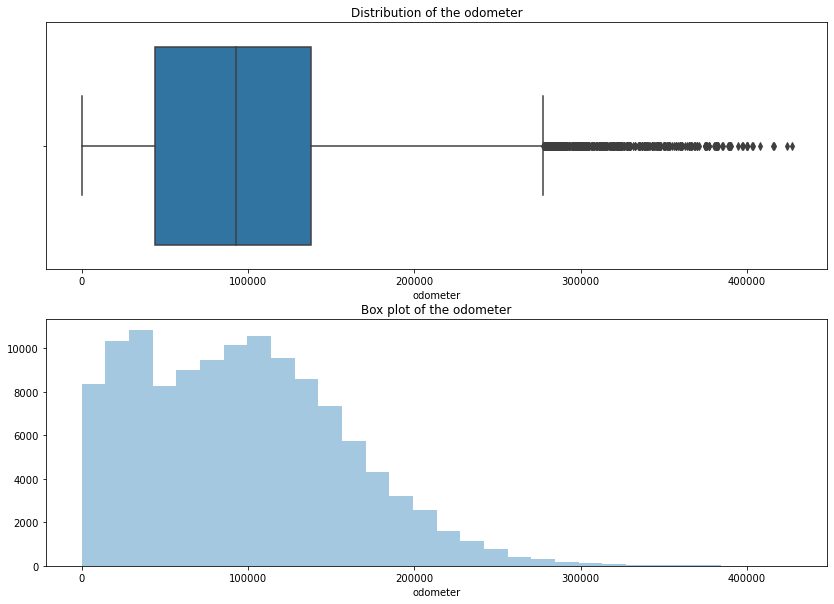

In [31]:
fig, axs = plt.subplots(2, figsize=(14, 10))
sns.distplot(df['odometer'], ax = axs[1], bins=30, kde=False)
axs[1].set_title('Box plot of the odometer')
sns.boxplot(x='odometer', data = df, ax=axs[0])
axs[0].set_title('Distribution of the odometer')

Now let's see how differnt factors influence the car prices

In [32]:
df['paint_color'].value_counts()

white     29207
black     25453
silver    18264
red       13486
blue      13298
grey      11877
custom     3720
green      3181
brown      2891
yellow      800
orange      664
purple      320
Name: paint_color, dtype: int64

<AxesSubplot:title={'center':'Box plot of the prices on each color'}, xlabel='paint_color', ylabel='price'>

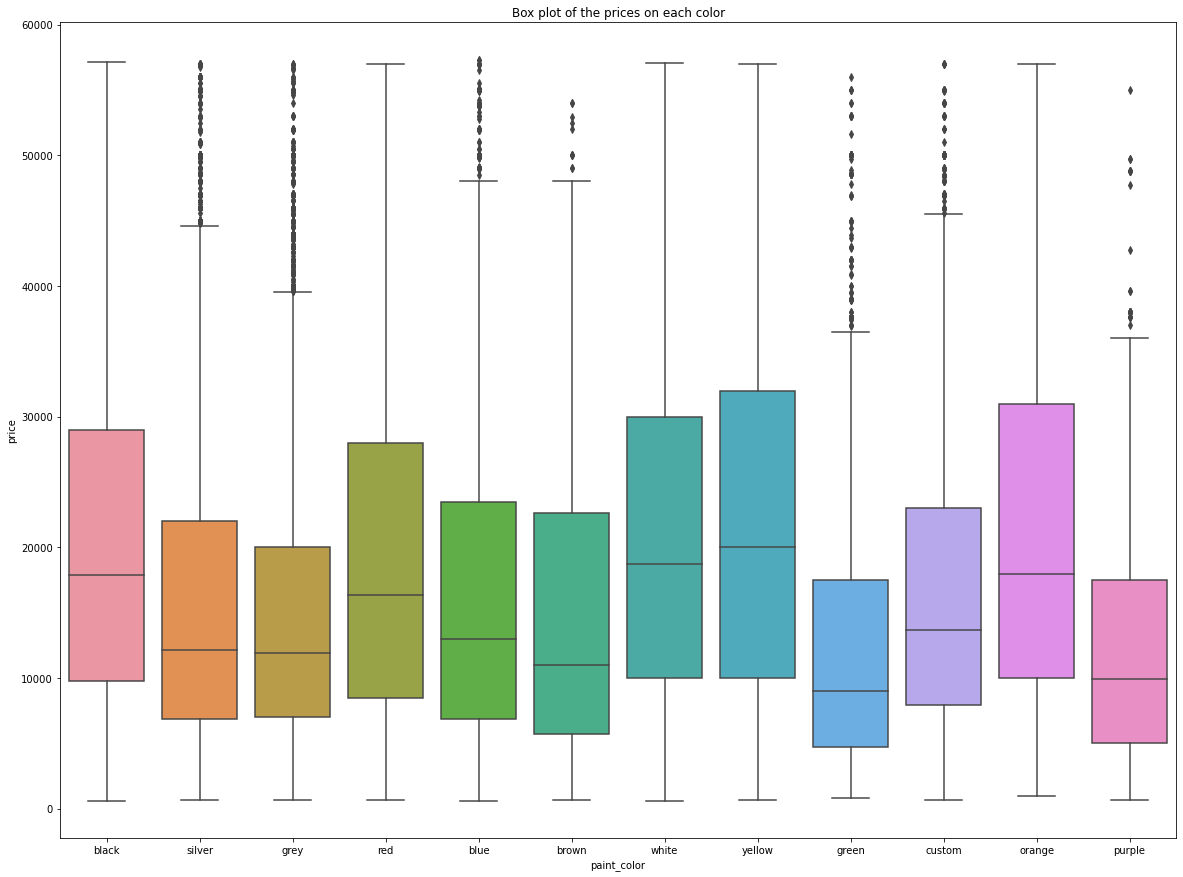

In [33]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Box plot of the prices on each color')
sns.boxplot(x='paint_color', y='price', data = df)

Besides customized colors, there are **11** different common colors in the dataset. It seems that **white, black, orange and yellow** cars are the top 4 colors ranked by their median prices. By contrast, **green and purple** are the least welcome colors. Note that due to relatively fewer samples for purple, yellow and orange, the statement above may not totally correct.

sedan          34125
SUV            30236
pickup         17565
truck          13796
coupe           7082
hatchback       5092
wagon           4258
other           4140
van             2514
mini-van        2226
convertible     1822
offroad          275
bus               30
Name: type, dtype: int64


<AxesSubplot:title={'center':'Box plot of the prices on each car type'}, xlabel='type', ylabel='price'>

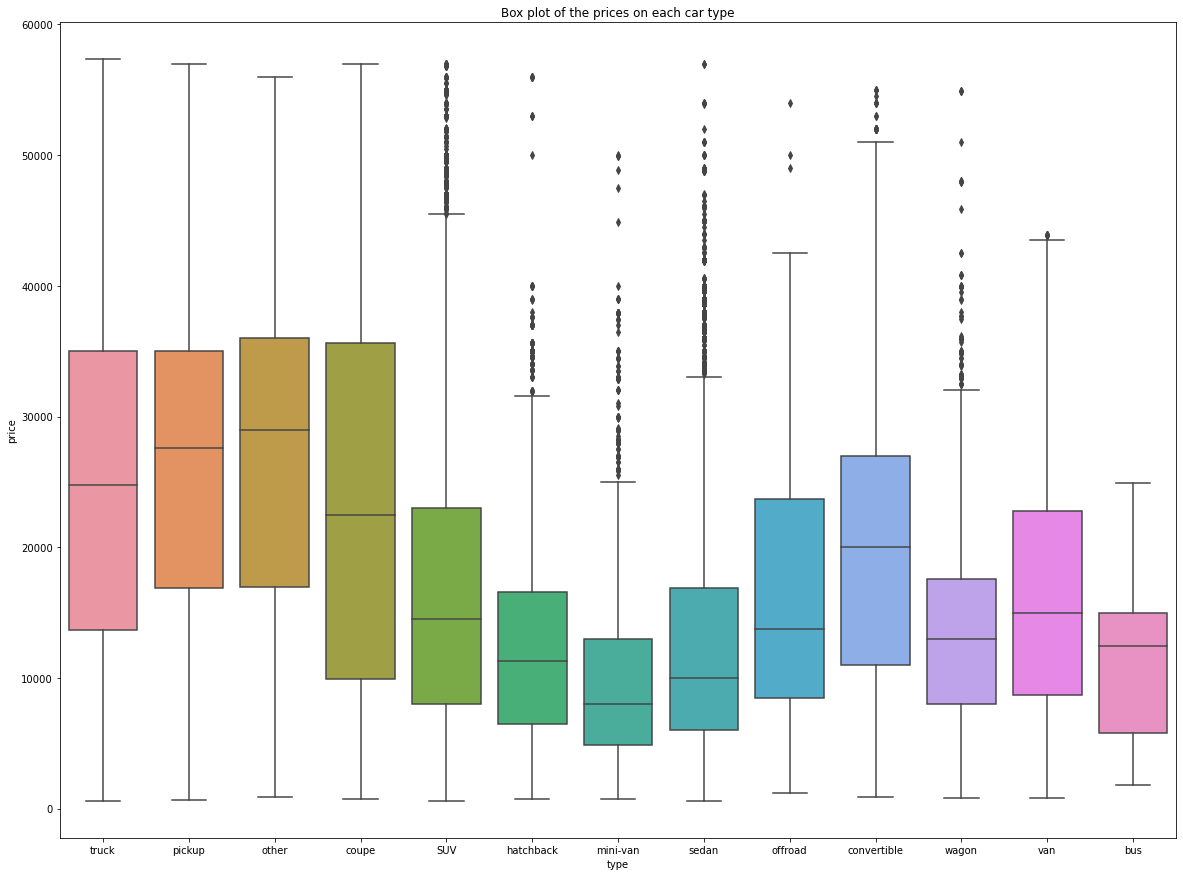

In [34]:
print(df['type'].value_counts())
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Box plot of the prices on each car type')
sns.boxplot(x='type', y='price', data = df)

**Pickup cars, trucks and buses have higher prices** as they cost higher for new. The prices for **sedan, wagon, hatchback and mini-van are more stable**.

Condition:
good         41226
null         38685
excellent    34538
like new      6149
fair          2186
new            224
salvage        153
Name: condition, dtype: int64

Cylinders:
4 cylinders     33334
6 cylinders     33291
null            29902
8 cylinders     25237
5 cylinders       673
10 cylinders      334
other             255
3 cylinders       126
12 cylinders        9
Name: cylinders, dtype: int64

Fuel:
gas         109191
other         6119
diesel        5855
hybrid        1560
electric       436
Name: fuel, dtype: int64

Transmission:
automatic    99329
other        17902
manual        5930
Name: transmission, dtype: int64

Drive:
4wd    52018
fwd    48898
rwd    22245
Name: drive, dtype: int64


<AxesSubplot:xlabel='drive', ylabel='price'>

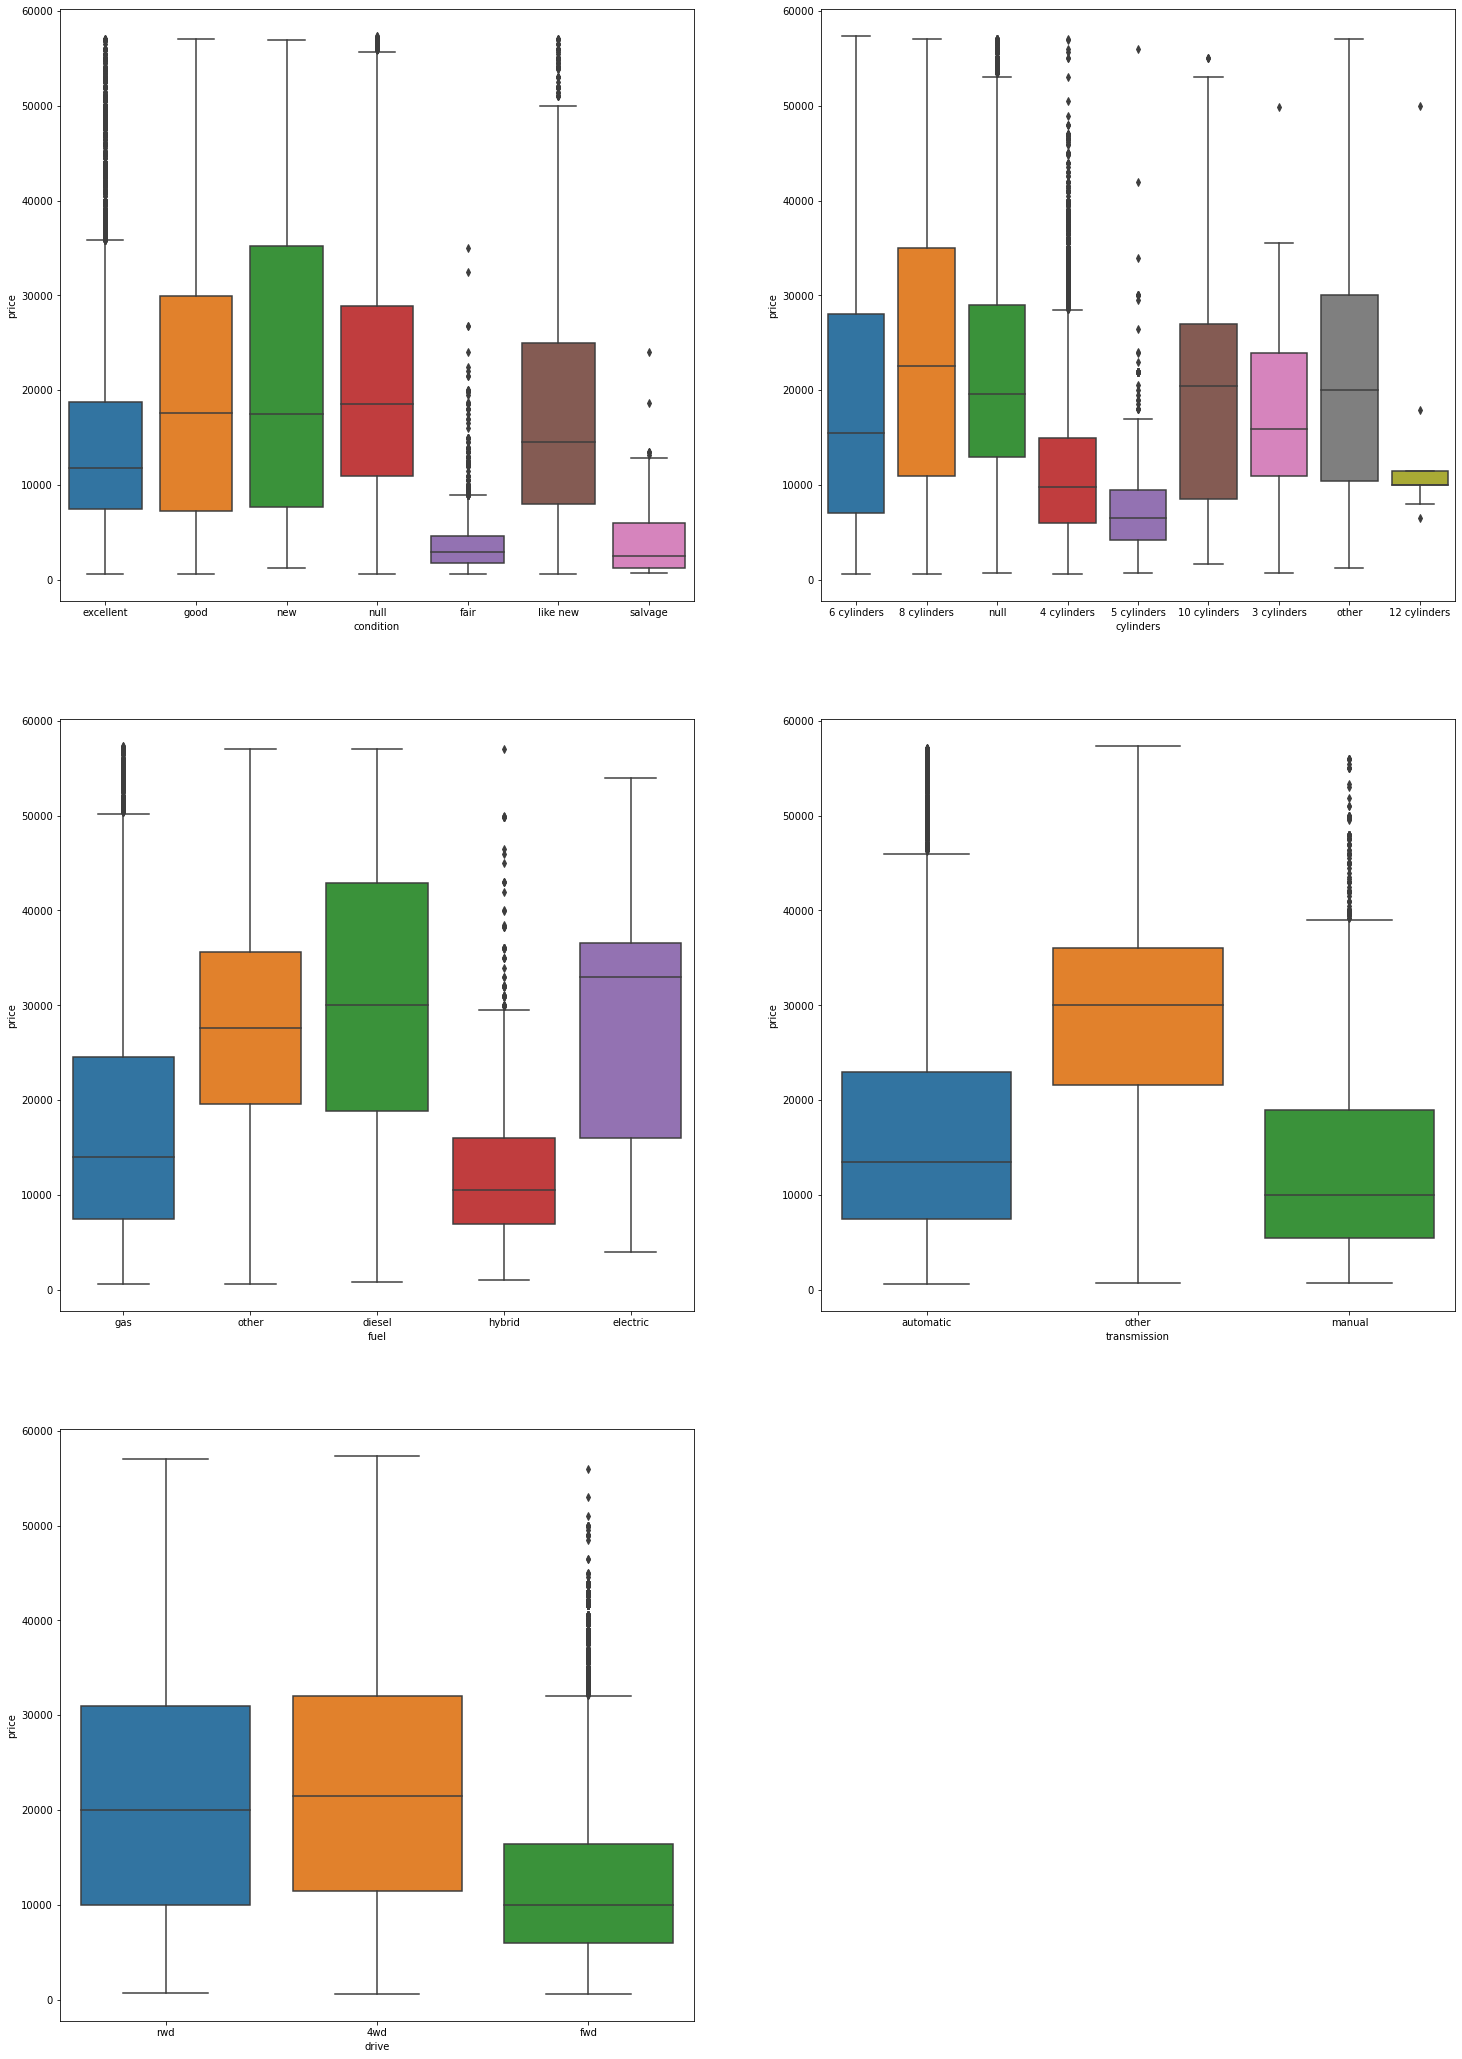

In [35]:
print('Condition:')
print(df['condition'].value_counts())
print('\nCylinders:')
print(df['cylinders'].value_counts())
print('\nFuel:')
print(df['fuel'].value_counts())
print('\nTransmission:')
print(df['transmission'].value_counts())
print('\nDrive:')
print(df['drive'].value_counts())

fig=plt.figure(figsize=(25,37))
fig.add_subplot(3, 2, 1)
 
sns.boxplot(x='condition', y='price', data = df)
fig.add_subplot(3, 2, 2)
sns.boxplot(x='cylinders', y='price', data = df)
fig.add_subplot(3, 2, 3)
sns.boxplot(x='fuel', y='price', data = df)
fig.add_subplot(3, 2, 4)
sns.boxplot(x='transmission', y='price', data = df)
fig.add_subplot(3, 2, 5)
sns.boxplot(x='drive', y='price', data = df)

From these five figures we conclude the following reasonable phenomena:
- New and like-new cars tend to be more expensive, while cars with fair and salvage conditions tend to be much cheaper. 
- Cars with 6, 8 or 10 cylinders tend to be more expensive,  while 4 and 5-cylinder cars are cheaper.
- Diesel cars are more expensive than gas and hybrid cars.
- Cars with "other" transmission (possibly CVT) tend to be the most expensive. Cars with automatic transmission tend to be more expensive than those with manual transmission.
- Cars equipped with all-wheel drive tend to be more expensive than those with front-wheel drive.

<AxesSubplot:title={'center':'Scatter plot of the prices in each year, colored by transmission type'}, xlabel='year', ylabel='price'>

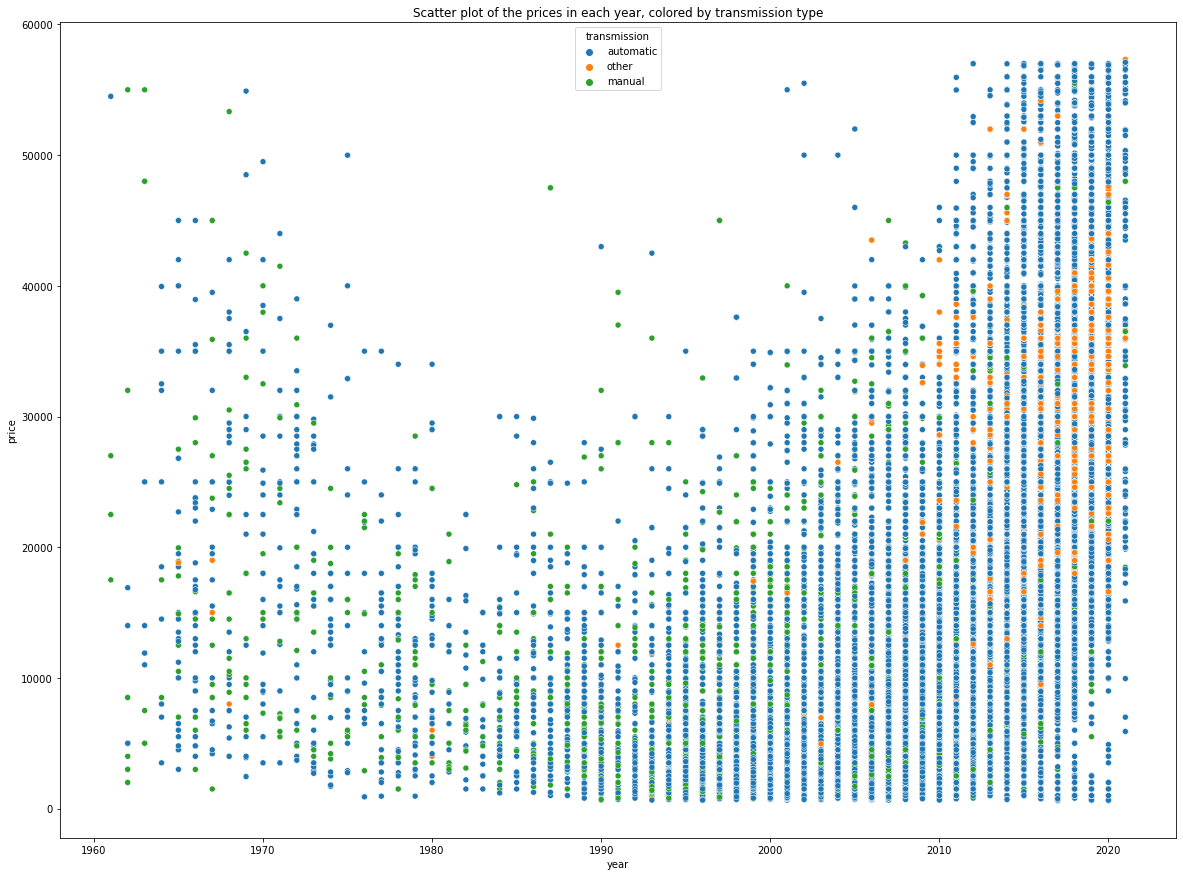

In [36]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the prices in each year, colored by transmission type')
#sns.scatterplot(x='year', y='price', data=df[(df['transmission'] =='manual') | (df['transmission'] =='other')], hue = 'transmission')
sns.scatterplot(x='year', y='price', data=df, hue = 'transmission')


**Higher prices are more likely to be seen in newer cars**. Older cars tend to be cheaper (but not always).

Although there are more and more cars with automatic transmission, manual types are still very poplular. Also, there appears to be **more cars with "other" transimission since 2010**. I guess they include new type gearboxes such as **CVT** and DCT.

<AxesSubplot:title={'center':'Scatter plot of the prices in each year, colored by drive type'}, xlabel='year', ylabel='price'>

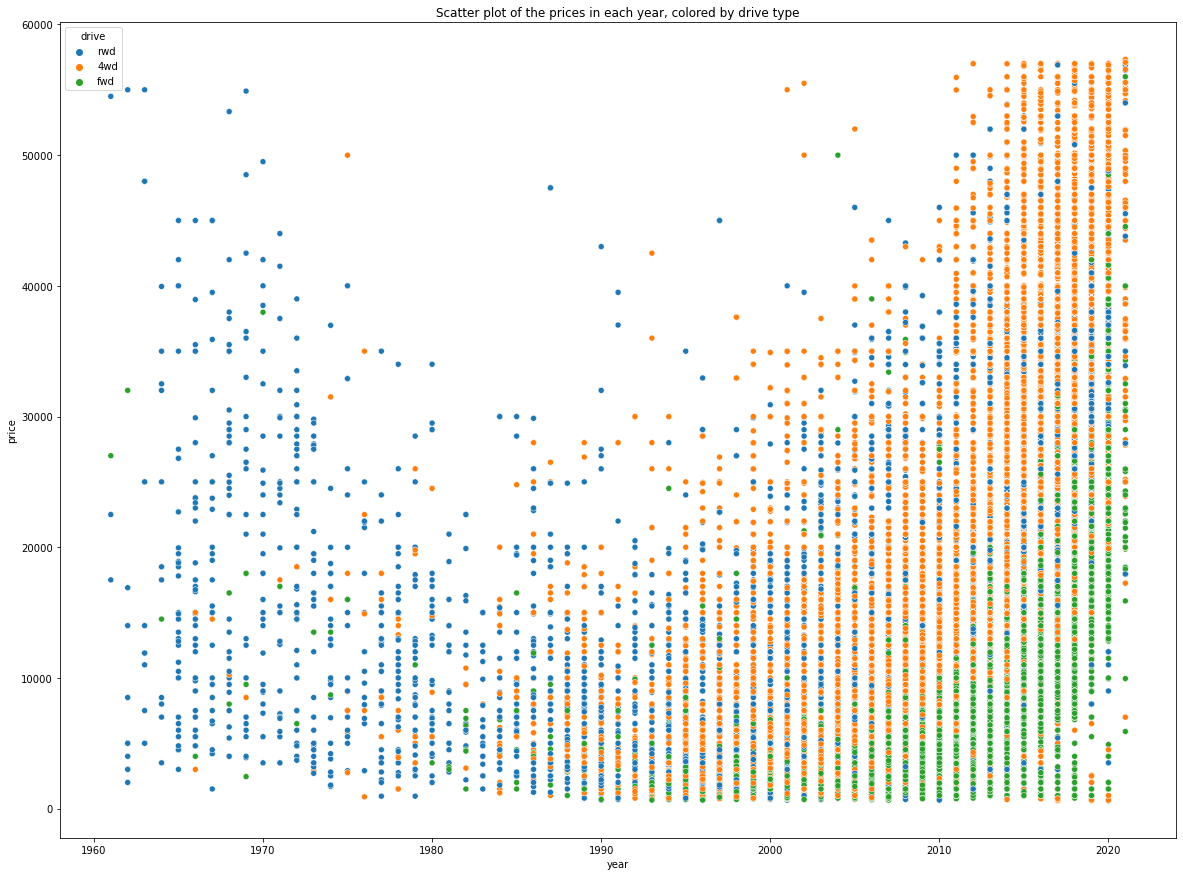

In [37]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the prices in each year, colored by drive type')
sns.scatterplot(x='year', y='price', data=df, hue = 'drive')

We see that **most of the old cars (older than 1990) are rear wheel drive**. **Front wheel drive and all wheel drive started to get popular since 1990**. **Cars with AWD are obviously more expensive than cars with FWD**, which is quite reasonable. There are still some expensive cars with RWD, I guess it is because RWD are equipped by many sports car nowadays.

<AxesSubplot:title={'center':'Scatter plot of the prices in each year, colored by fuel type'}, xlabel='year', ylabel='price'>

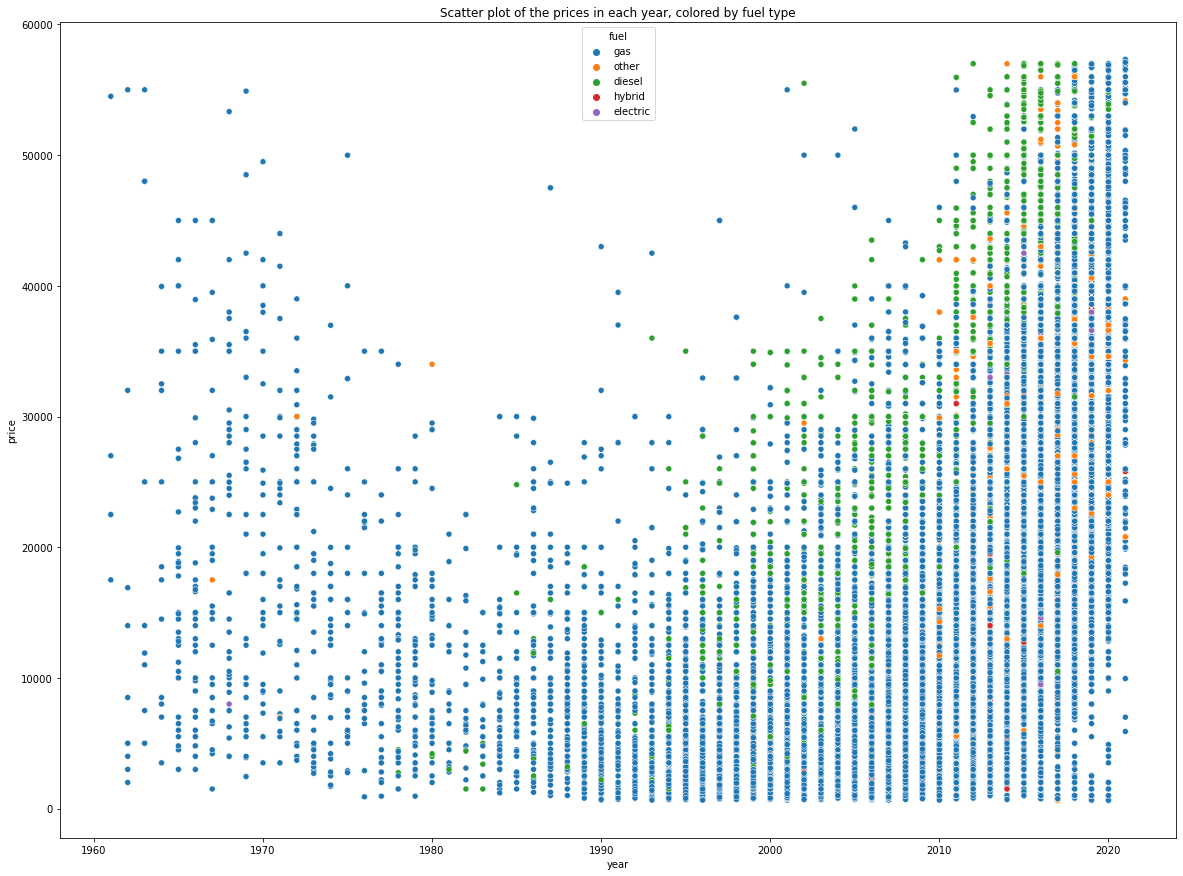

In [38]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the prices in each year, colored by fuel type')
sns.scatterplot(x='year', y='price', data=df, hue = 'fuel')

It is obvious to see that **diesel cars tend to be more expensive than gas cars**. One of the main reason could be diesel engines are usually more expensive and are **mostly equipped by high power vehicles such as trucks, buses and upmarket SUVs**. A strange phenomenon is that although diesel engines appear far earlier than gas engines, **we can hardly see them in the used cars older than 1990**.

<AxesSubplot:title={'center':'Scatter plot of the prices in each year, colored by cylinder type'}, xlabel='year', ylabel='price'>

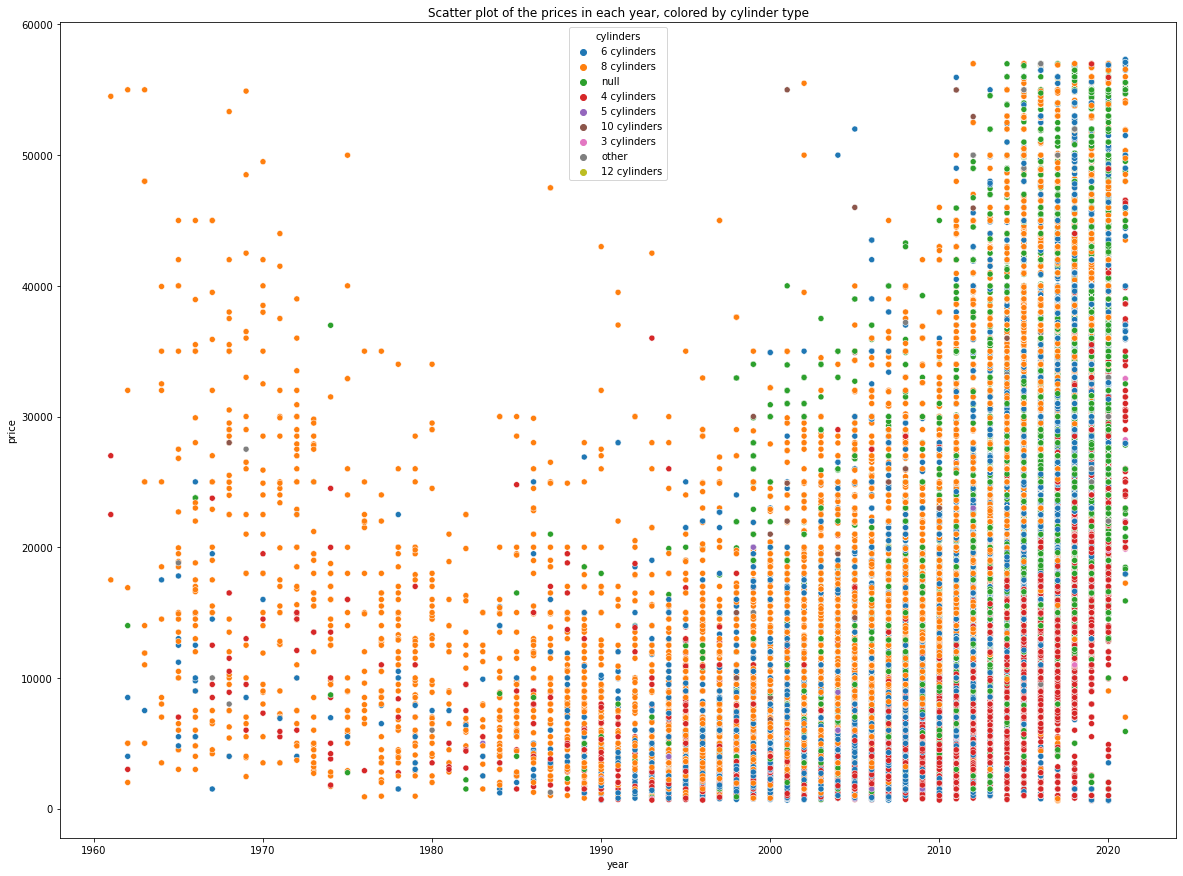

In [39]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the prices in each year, colored by cylinder type')
sns.scatterplot(x='year', y='price', data=df, hue = 'cylinders')

We can see that **most of the cars have 8 cylinders before 1990**. In recent years, **upmarket is occupied by 6 and 8-cylinder cars** and **relatively cheap cars are mainly 4-cylinder type**.

<AxesSubplot:title={'center':'Scatter plot of the odometer of the cars in each year, colored by car condition'}, xlabel='year', ylabel='odometer'>

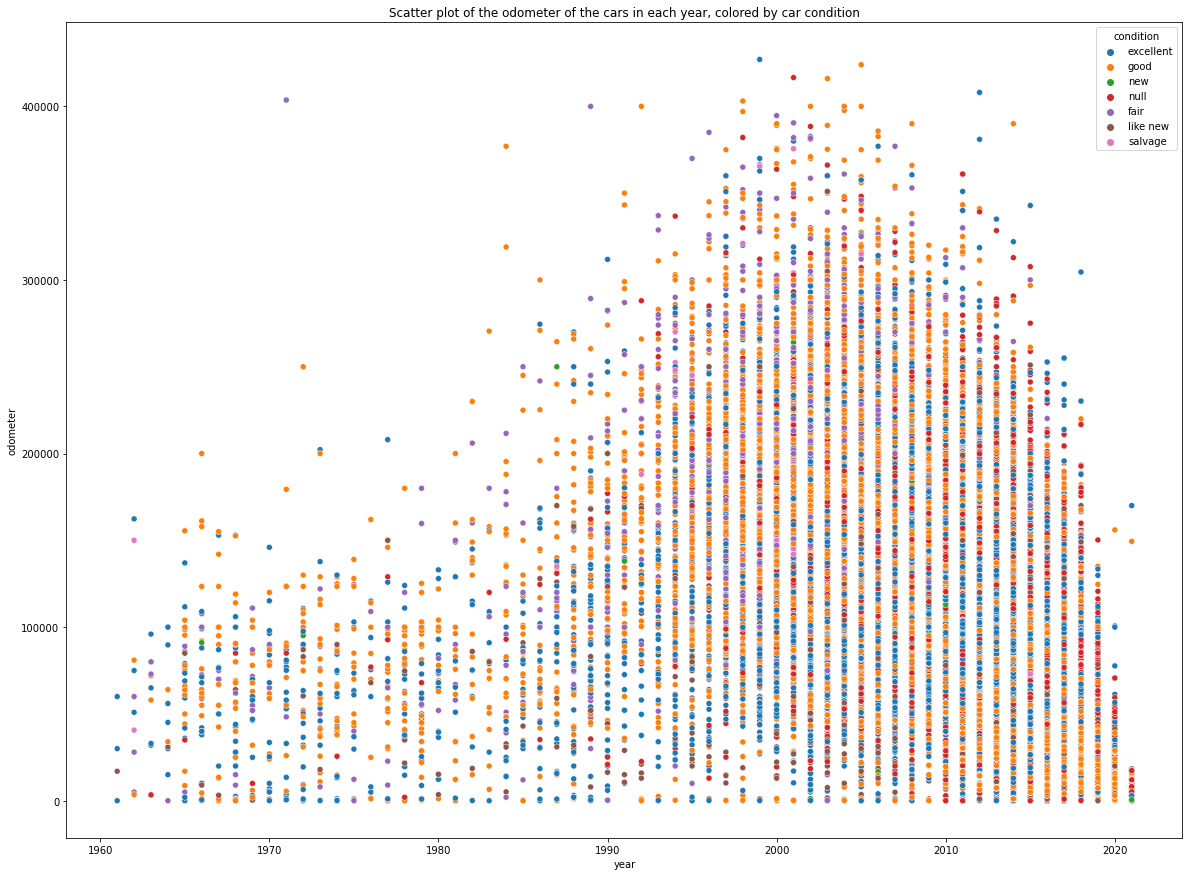

In [40]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the odometer of the cars in each year, colored by car condition')
sns.scatterplot(x='year', y='odometer', data=df, hue = 'condition')

**Higher odometer are more likely to be seeing in cars around 2005**. It is reasonable as **newer cars have not yet to accumulate high mileage**, while **older cars need to have lower mileage to be sold in a desent price in the used car market**. If a car has both high age and mileage, then the owner may directly sell the parts to the repair shop rather than selling it as a used car.

Also, we **can not see straight forward correlation between "condition" and "odometer" (or "year")**, which is a surprise. Myabe different people hold different views toward "condition" as it is quite subjective.

<AxesSubplot:title={'center':'Count plot of all cars group by manufacturer'}, xlabel='manufacturer', ylabel='count'>

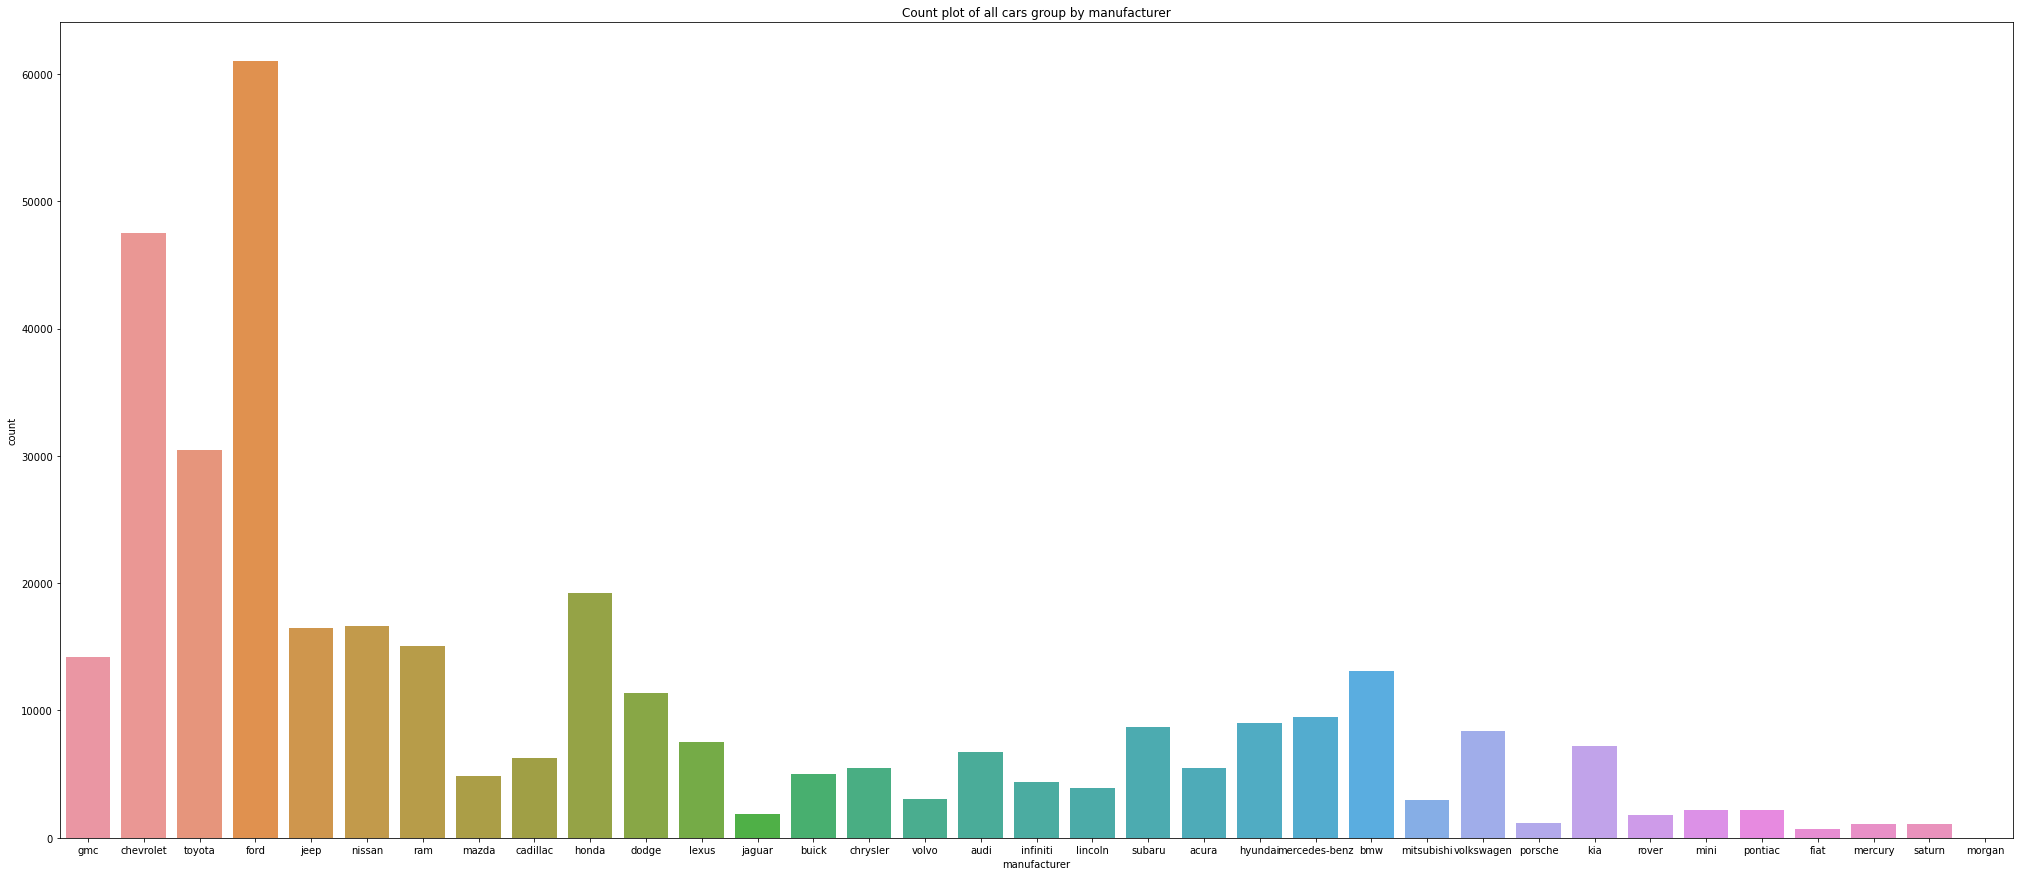

In [41]:
fig, ax = plt.subplots(figsize=(35,15))
ax.set_title('Count plot of all cars group by manufacturer')
sns.countplot(x='manufacturer', data=df_man)

From the table we see that the top five popular brands in the used car market are **Ford, Chevrolet, Toyota, Nissan and Jeep**.

<AxesSubplot:title={'center':'Person correlations among prices, years and mileages'}>

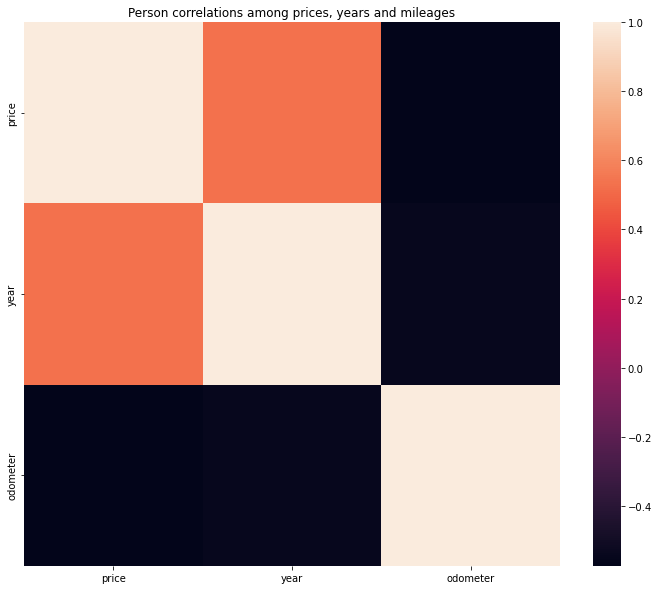

In [42]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Person correlations among prices, years and mileages')
sns.heatmap(df.corr())

This is another way to see the **high correlations among years mileages and prices**

## Modeling

With final dataset in hand, it is now time to build some models.  The following sections demonstrates few regression models with the price as the target.  In building models, explored different parameters and cross-validations as findings.

<a id="5"></a>
### 5. Model preparation
[Back to top](#head)

Before feeding those data to the machine learning models to predict prices, we still need to finish the following preparation tasks.

<a id="5.1"></a>
#### 5.1 Encoding categorical features

We transform the string values in all categorical features into numeric values using **One Hot Encoding scheme**. Note that the "*drop_first*" parameter in "*get_dummies*" is to remove the first column for each feature to avoid the collinearity problem because of the correlations among each newly created columns.

In [43]:
cate_Columns = ['model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
for column in cate_Columns:
    column = pd.get_dummies(df[column],drop_first=True)
    df = pd.concat([df,column],axis=1)
df = df.drop(columns = cate_Columns)

In [44]:
df.head()

price    year  odometer  1500  1500 4x4  1500 big horn  1500 classic  \
31  15000  2013.0  128000.0     0         0              0             0   
32  27990  2012.0   68696.0     0         0              0             0   
33  34590  2016.0   29499.0     0         0              0             0   
34  35000  2019.0   43000.0     0         0              0             0   
35  29990  2016.0   17302.0     0         0              0             0   

    1500 crew cab  1500 crew cab big horn  1500 laramie 4x4 gas  ...  brown  \
31              0                       0                     0  ...      0   
32              0                       0                     0  ...      0   
33              0                       0                     0  ...      0   
34              0                       0                     0  ...      0   
35              0                       0                     0  ...      0   

    custom  green  grey  orange  purple  red  silver  white  yellow  
31       0      0     0       0       0    0       0      0       0  
32       0      0     0       0       0    0       0      0       0  
33       0      0     0       0       0    0       1      0       0  
34       0      0     1       0       0    0       0      0       0  
35       0      0     0       0       0    1       0      0       0  

[5 rows x 657 columns]

<a id="5.2"></a>
#### 5.2 Normalization

We also need to **normalize the values** in the numerical features ("year" and "odometer"), as they do not have the same scale as the other newly created columns.

In [45]:
std_scaler = StandardScaler()

for column in ['year', 'odometer']:
    df[column] = std_scaler.fit_transform(df[column].values.reshape(-1,1))

In [46]:
df.head()

price      year  odometer  1500  1500 4x4  1500 big horn  1500 classic  \
31  15000  0.145095  0.508656     0         0              0             0   
32  27990 -0.012861 -0.454613     0         0              0             0   
33  34590  0.618962 -1.091286     0         0              0             0   
34  35000  1.092830 -0.871990     0         0              0             0   
35  29990  0.618962 -1.289400     0         0              0             0   

    1500 crew cab  1500 crew cab big horn  1500 laramie 4x4 gas  ...  brown  \
31              0                       0                     0  ...      0   
32              0                       0                     0  ...      0   
33              0                       0                     0  ...      0   
34              0                       0                     0  ...      0   
35              0                       0                     0  ...      0   

    custom  green  grey  orange  purple  red  silver  white  yellow  
31       0      0     0       0       0    0       0      0       0  
32       0      0     0       0       0    0       0      0       0  
33       0      0     0       0       0    0       1      0       0  
34       0      0     1       0       0    0       0      0       0  
35       0      0     0       0       0    1       0      0       0  

[5 rows x 657 columns]

<a id="5.3"></a>
#### 5.3 Split training and testing set

We set **70%** of the data to be the training set, leaving the remaining for testing.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price',axis=1), 
                                                    df['price'], test_size=0.3, 
                                                    random_state=141)

<a id="6"></a>
### 6. Models and tuning
[Back to top](#head)

In this section, we are going to create and train several machine learning models to see their performance in this used car dataset for price prediction.

As it is a regression problem, we use **R2 score** and **root mean squared error** as the way to evaluate our models.

In [48]:
model_score = pd.DataFrame(columns=('r2', 'rmse', 'average of cv_scores (5 folds)'))

<a id="6.1"></a>
#### 6.1 Linear Regression

In Scikit Learn, ***LinearRegression()*** is using **Ordinary Least Squares** to calculate the coefficients in the linear regression model, without the "learning" process through gradient descent.

In [49]:
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()

For the linear regressor, the root mean square error for the testing set is: 4963.962084393753
The r2 score for the testing set is: 0.8331722040461909
Cross validation scores (5 folds): [0.82898494 0.82934886 0.82817571 0.83360827 0.83038106]
The average cross validation score (5 folds): 0.8300997678883224


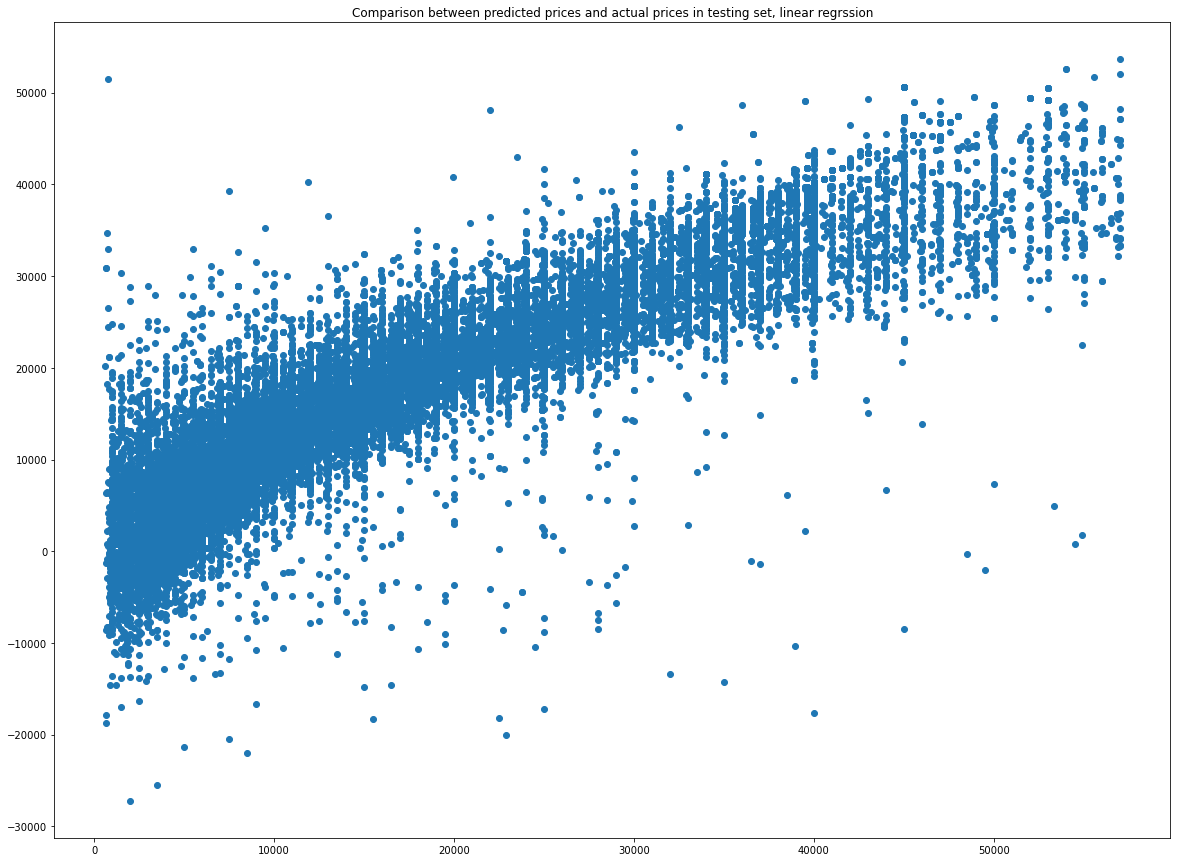

In [50]:
lr_predict = lrmodel.predict(X_test)

lr_r2 = metrics.r2_score(y_test, lr_predict)
lr_rmse = math.sqrt(metrics.mean_squared_error(y_test, lr_predict))

#model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'rmse':[lr_rmse]}, index = ['Linear Regression']))

print('For the linear regressor, the root mean square error for the testing set is:', lr_rmse)
print('The r2 score for the testing set is:', lr_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, linear regrssion')
plt.scatter(y_test, lr_predict)

#Cross Validation to check for overfitting
cv_scores_lr = cross_val_score(lrmodel, X_train, y_train, cv = 5 )
# %store -r cv_scores
print('Cross validation scores (5 folds): {}'.format(cv_scores_lr))
print('The average cross validation score (5 folds): {}'.format(np.mean(cv_scores_lr)))

model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'rmse':[lr_rmse], 'average of cv_scores (5 folds)':[np.mean(cv_scores_lr)]}, index = ['Linear Regression']))


We can see that linear regression model does not perform well in the dataset. To show whether it is overfitting, we calculate the score for the **training set**:

<a id="6.2"></a>
#### 6.2 Lasso Regression

Lasso Regression is a linear regression model with **L1 regularization** factor to eliminate the errors caused by the collinearity problem and overfitting. We choose **12 regularization coefficents** and choose the best via **cross validation** method.

Although we see from above that the poor performance of the linear model is **not caused by overfitting**, we still decide to give Lasso a try.

In [51]:
#alphas = np.logspace(-4,4,12)
alphas = 10**np.linspace(0.000001,1,10)*0.5
lasso = LassoCV(max_iter=10**6, alphas=alphas)
lasso.fit(X_train, y_train)

LassoCV(alphas=array([0.50000115, 0.64577615, 0.83405176, 1.077219  , 1.39128148,
       1.79690867, 2.3207962 , 2.99742279, 3.8713194 , 5.        ]),
        max_iter=1000000)

For the Lasso linear regressor, the root mean square error for the testing set is: 5004.4816723947915
The r2 score for the testing set is: 0.8304375406057227
Cross validation scores (5 folds): [0.82573826 0.82600693 0.8251161  0.82972522 0.82728868]
The average cross validation score (5 folds): 0.8267750384523616


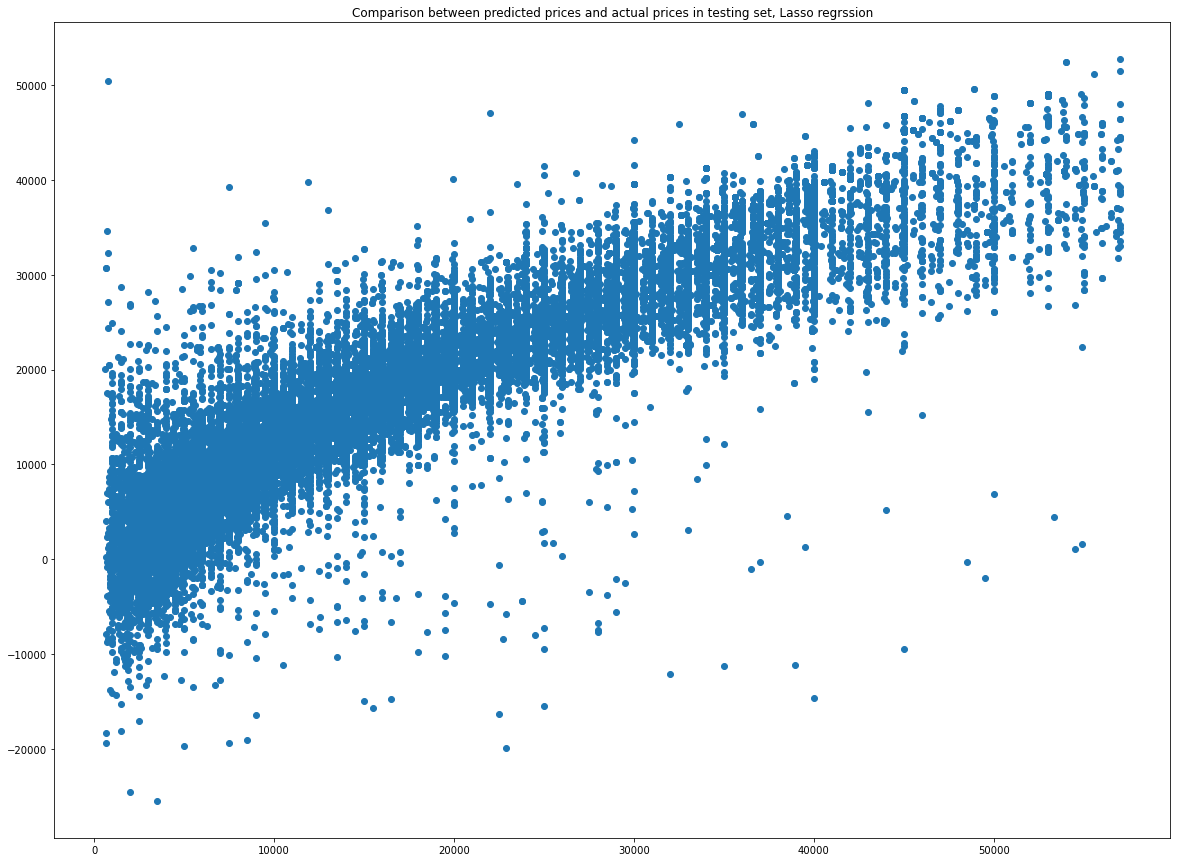

In [52]:
lasso_predict = lasso.predict(X_test)

lasso_r2 = metrics.r2_score(y_test, lasso_predict)
lasso_rmse = math.sqrt(metrics.mean_squared_error(y_test, lasso_predict))

print('For the Lasso linear regressor, the root mean square error for the testing set is:', lasso_rmse)
print('The r2 score for the testing set is:', lasso_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, Lasso regrssion')
plt.scatter(y_test, lasso_predict)

#Cross Validation to check for overfitting
cv_scores_lasso = cross_val_score(lasso, X_train, y_train, cv = 5 )
# %store -r cv_scores
print('Cross validation scores (5 folds): {}'.format(cv_scores_lasso))
print('The average cross validation score (5 folds): {}'.format(np.mean(cv_scores_lasso)))

model_score = model_score.append(pd.DataFrame({'r2':[lasso_r2], 'rmse':[lasso_rmse], 'average of cv_scores (5 folds)':[np.mean(cv_scores_lasso)]}, index = ['Lasso Regression']))


Within expectation, the result is very close to the previous linear regression model.

With **r2 = 0.801, it seems like the best a linear model can do**, unless we do some deeper processing with the dataset itself.

<a id="6.4"></a>
#### 6.3 RidgeCV Regression

In [53]:
alphas = 10**np.linspace(0.000001,1,10)*0.5
param_grid = {'ridge__alpha': alphas}

# RidgeCV method
ridge_cv=RidgeCV(alphas=alphas, scoring = 'neg_mean_squared_error', store_cv_values=True)
ridgecv = ridge_cv.fit(X_train,y_train)
print(ridgecv.alpha_)
print(np.mean(ridgecv.cv_values_, axis=0))

0.500001151293872
[-0.05751999 -0.05991701 -0.06349716 -0.06851764 -0.0752831  -0.0841392
 -0.09544711 -0.10953056 -0.1265894  -0.14658154]


For the RidgeCV linear regressor, the root mean square error for the testing set is: 4963.591163897589
The r2 score for the testing set is: 0.8331971347510929
Cross validation scores (5 folds): [0.82891167 0.82931766 0.82819509 0.83348427 0.83028459]
The average cross validation score (5 folds): 0.830038655943514


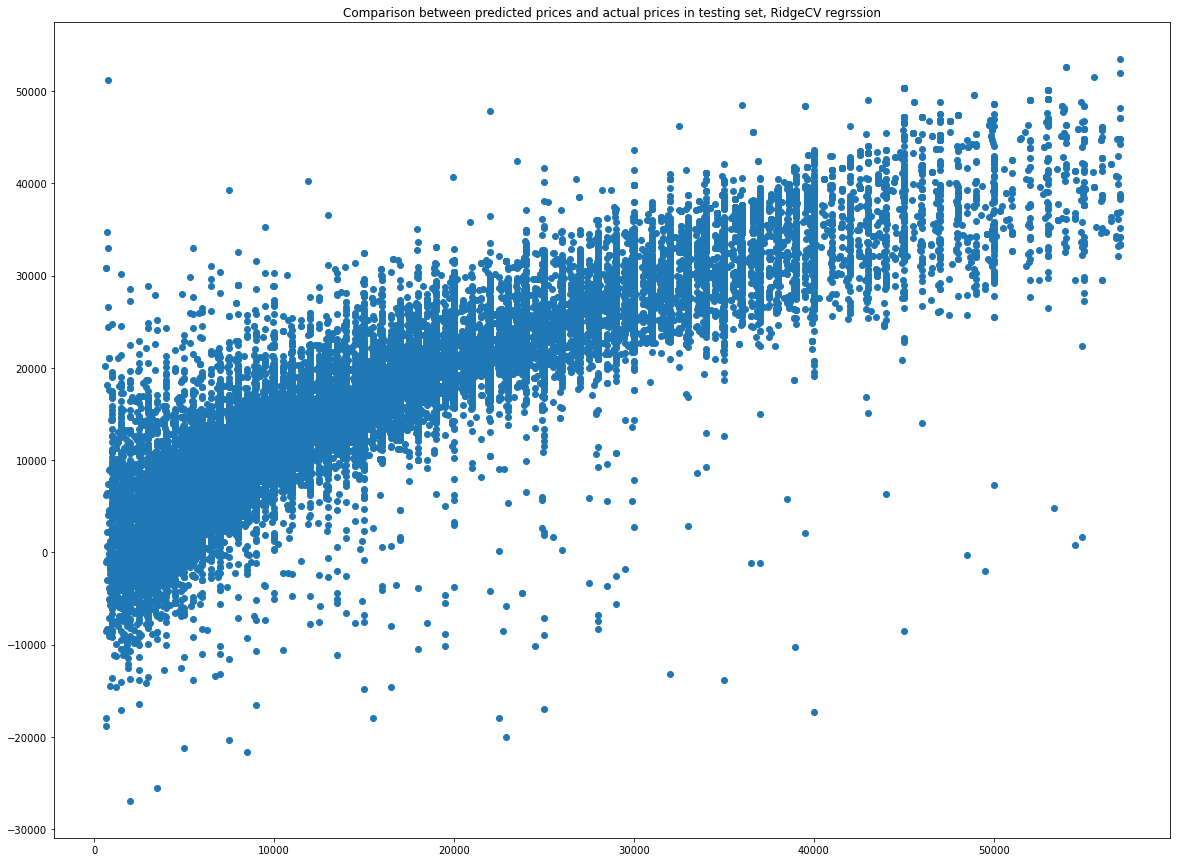

In [54]:
ridgecv_predict = ridgecv.predict(X_test)

ridgecv_r2 = metrics.r2_score(y_test, ridgecv_predict)
ridgecv_rmse = math.sqrt(metrics.mean_squared_error(y_test, ridgecv_predict))

#model_score = model_score.append(pd.DataFrame({'r2':[ridgecv_r2], 'rmse':[ridgecv_rmse]}, index = ['RidgeCV Regression']))

print('For the RidgeCV linear regressor, the root mean square error for the testing set is:', ridgecv_rmse)
print('The r2 score for the testing set is:', ridgecv_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, RidgeCV regrssion')
plt.scatter(y_test, ridgecv_predict)

#Cross Validation to check for overfitting
cv_scores_rcv = cross_val_score(ridgecv, X_train, y_train, cv = 5 )
# %store -r cv_scores
print('Cross validation scores (5 folds): {}'.format(cv_scores_rcv))
print('The average cross validation score (5 folds): {}'.format(np.mean(cv_scores_rcv)))

model_score = model_score.append(pd.DataFrame({'r2':[ridgecv_r2], 'rmse':[ridgecv_rmse], 'average of cv_scores (5 folds)':[np.mean(cv_scores_rcv)]}, index = ['RidgeCV Regression']))



<a id="6.4"></a>
#### 6.4 Ridge Regression using GridSearchCV

In [55]:
#define cross validation evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define parameters
alphas = 10**np.linspace(0.000001,1,10)*0.5
param_grid = {'ridge__alpha': alphas}

#define model
model = make_pipeline(StandardScaler(), Ridge())

# define search
gridsearch = GridSearchCV(model, param_grid, scoring='r2', n_jobs=-1, cv=cv)

# execute search
gridresult = gridsearch.fit(X_train, y_train)

For the GridSearchCV linear regressor, the root mean square error for the testing set is: 4963.958351182422
The r2 score for the testing set is: 0.8331724549760624
The best number of features for Ridge model using GridSearchCV: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=5.0))])
Cross validation scores (5 folds): [0.82898468 0.82934838 0.82817997 0.83360546 0.8303811 ]
The average cross validation score (5 folds): 0.8300999182969253


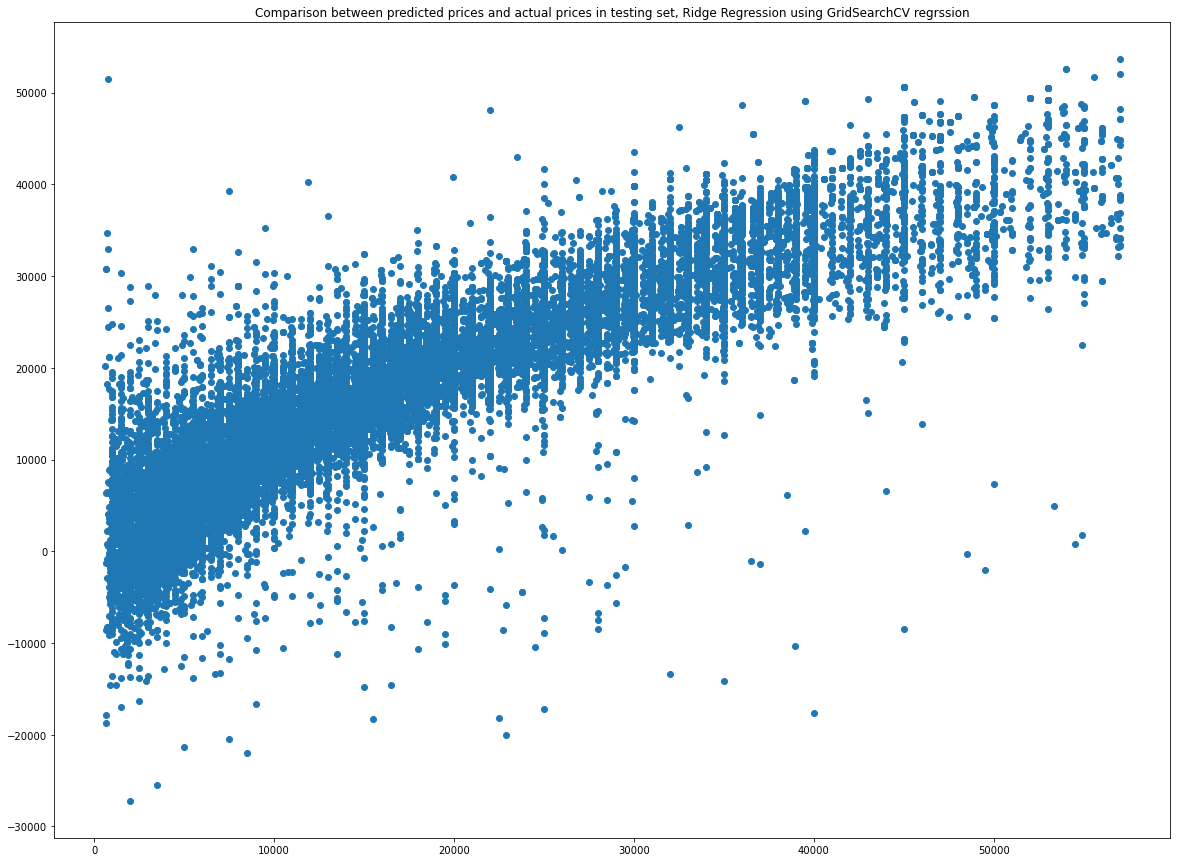

In [57]:
# prediction and scores
gridresult_predict = gridresult.predict(X_test)

gridresult_r2 = metrics.r2_score(y_test, gridresult_predict)
gridresult_rmse = math.sqrt(metrics.mean_squared_error(y_test, gridresult_predict))

#model_score = model_score.append(pd.DataFrame({'r2':[gridresult_r2], 'rmse':[gridresult_r2]}, index = ['GridSearchCV Regression']))

print('For the GridSearchCV linear regressor, the root mean square error for the testing set is:', gridresult_rmse)
print('The r2 score for the testing set is:', gridresult_r2)
print('The best number of features for Ridge model using GridSearchCV:', gridresult.best_estimator_)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, Ridge Regression using GridSearchCV regrssion')
plt.scatter(y_test, gridresult_predict)

#Cross Validation to check for overfitting
cv_scores_grid = cross_val_score(gridsearch, X_train, y_train, cv = 5 )
# %store -r cv_scores
print('Cross validation scores (5 folds): {}'.format(cv_scores_grid))
print('The average cross validation score (5 folds): {}'.format(np.mean(cv_scores_grid)))

model_score = model_score.append(pd.DataFrame({'r2':[gridresult_r2], 'rmse':[gridresult_r2], 'average of cv_scores (5 folds)':[np.mean(cv_scores_grid)]}, index = ['GridSearchCV Regression']))



<a id="6.5"></a>
#### 6.5 K-Nearest Neighbor

Sometimes KNN can achieve high accuracy, with the cost of time. As it is a type of "lazy study" model, the predicting time is very long even if the training is done.

We use ***GridSearchCV()*** to find the **best number of neighbors** via cross validation.

In [58]:
knnReg = KNeighborsRegressor()
#'weights':['uniform'],
param_grid = [
     {
         'n_neighbors':[i for i in range(1,7)]
     }]

grid_search_knn = GridSearchCV(knnReg, param_grid,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6]}], verbose=2)

In [59]:
knn_best = grid_search_knn.best_estimator_
knn_best

KNeighborsRegressor(n_neighbors=4)

**The best number of neighbors for our knn model is 4**.

For the K-NN regressor, the root mean square error for the testing set is: 3687.4169442339116
The r2 score for the testing set is: 0.9079431744230402
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................................n_neighbors=2; total time= 2.7min
[CV] END ......................................n_neighbors=3; total time=13.5min
[CV] END ......................................n_neighbors=5; total time= 2.7min
[CV] END ......................................n_neighbors=6; total time= 1.8min
[CV] END ......................................n_neighbors=2; total time= 1.6min
[CV] END ......................................n_neighbors=3; total time= 1.7min
[CV] END ......................................n_neighbors=5; total time= 1.5min
[CV] END ......................................n_neighbors=6; total time= 1.1min
[CV] END .............

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Cross validation scores (5 folds): [0.89882129 0.89589676 0.89347112 0.89698578 0.89885847]
The average cross validation score (5 folds): 0.8968066840720678


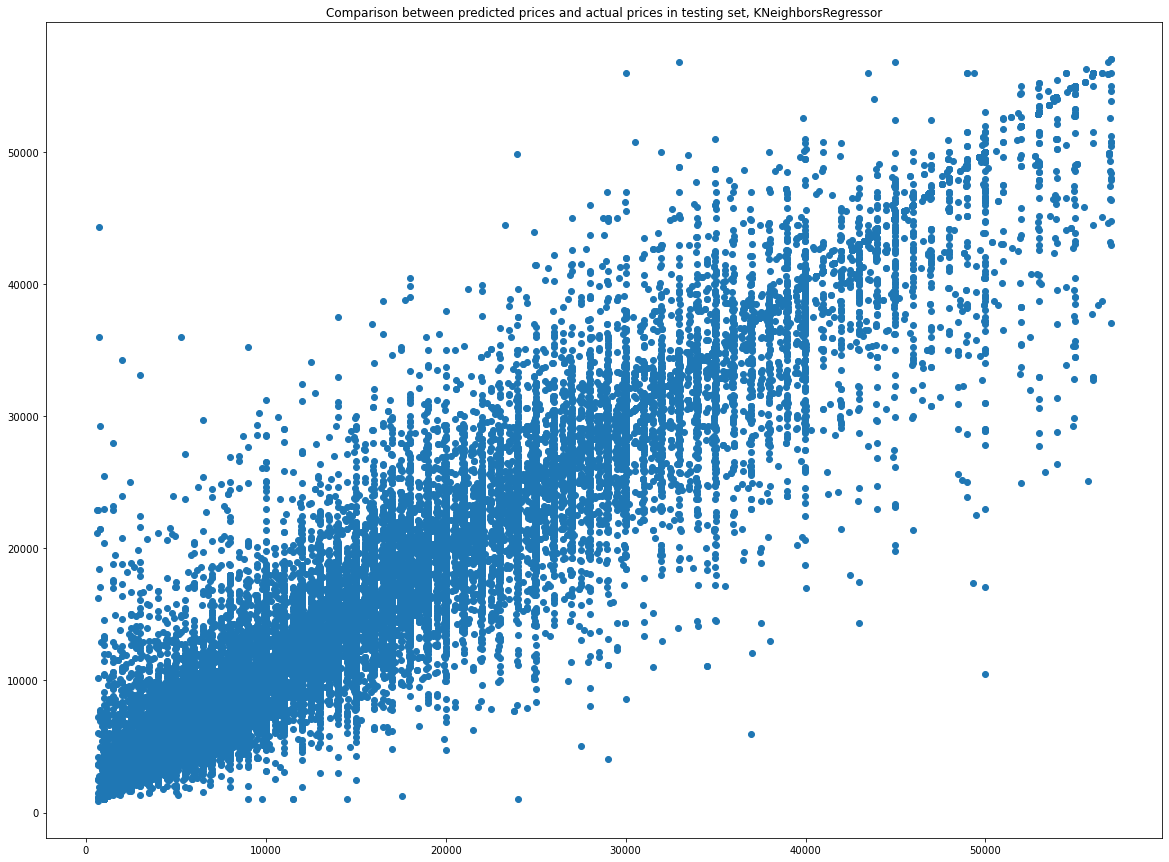

In [60]:
knn_predict = knn_best.predict(X_test)

knn_r2 = metrics.r2_score(y_test, knn_predict)
knn_rmse = math.sqrt(metrics.mean_squared_error(y_test, knn_predict))

#model_score = model_score.append(pd.DataFrame({'r2':[knn_r2], 'rmse':[knn_rmse]}, index = ['KNearest Neighbor']))

print('For the K-NN regressor, the root mean square error for the testing set is:', knn_rmse)
print('The r2 score for the testing set is:', knn_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, KNeighborsRegressor')
plt.scatter(y_test, knn_predict)

#Cross Validation to check for overfitting
cv_scores_knn = cross_val_score(grid_search_knn, X_train, y_train, cv = 5 )
# %store -r cv_scores
print('Cross validation scores (5 folds): {}'.format(cv_scores_knn))
print('The average cross validation score (5 folds): {}'.format(np.mean(cv_scores_knn)))

model_score = model_score.append(pd.DataFrame({'r2':[knn_r2], 'rmse':[knn_r2], 'average of cv_scores (5 folds)':[np.mean(cv_scores_knn)]}, index = ['KNearest Neighbor']))

                                                                                                                                 

We see that KNN model does achive a pretty high accuracy.

## Evaluation

With some modeling accomplished, the following table on comparison using R2, RMSE and cross validation values aim to reflect on what we identify as a high quality model and what we are able to learn from this.  This will help to review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  The  goal in this section is to distill findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

<a id="7"></a>
#### 7. Evaluate by model comparison using R2 score and RMSE values
[Back to top](#head)

In [61]:
model_score.sort_values(by=['r2'], ascending=False)

r2         rmse average of cv_scores (5 folds)
KNearest Neighbor        0.907943     0.907943                       0.896807
RidgeCV Regression       0.833197  4963.591164                       0.830039
GridSearchCV Regression  0.833172     0.833172                         0.8301
Linear Regression        0.833172  4963.962084                         0.8301
Lasso Regression         0.830438  5004.481672                       0.826775

## Deployment

From the dataframe above in evaluation section, we conclude that **KNearest Nighbor performs the first best and then RidgeCV Regression is the next best** for used card price predictions based of the dataset used in this analysis. Howver, the rmse is still around 3687 and 4963 respectively for these two best models, which is **pretty large compared to the actual prices**.

There are many reason for this. For example, we did not play very much with the parameters in the models above, indicating the models **could do better with proper parameters**. Also, the dataset may **not be clean enough**. There are some particular values in the categorical features that are insufficent (e.g. there are **only six 12-cylinder cars** and **165 electric cars** in total). **Some columns are still correlated**. A simple example is that most Subaru models (in the "model") are also AWD (in the "drive"). But most importantly, according to the scatter plot between the predicted prices and real prices, **there are always some points that have very large differences between the two**. I think the future job to make these model better is to **output these outliers and analyze the causes of this huge bias**.

Based on the key findings through out this document and inputs provided above, dealers can pursue next steps as recommended for fine tuning of these models provided here for better evaluation scores and predictions.